In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

'2022.09.1'

In [2]:
from rdkit.Chem import AllChem as Chem

In [3]:
import pandas as pd
from rdkit.Chem import PandasTools

In [4]:
df = pd.read_csv('smiles.csv')

In [5]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')

In [6]:
print(type(df.ROMol[0]))

<class 'rdkit.Chem.rdchem.Mol'>


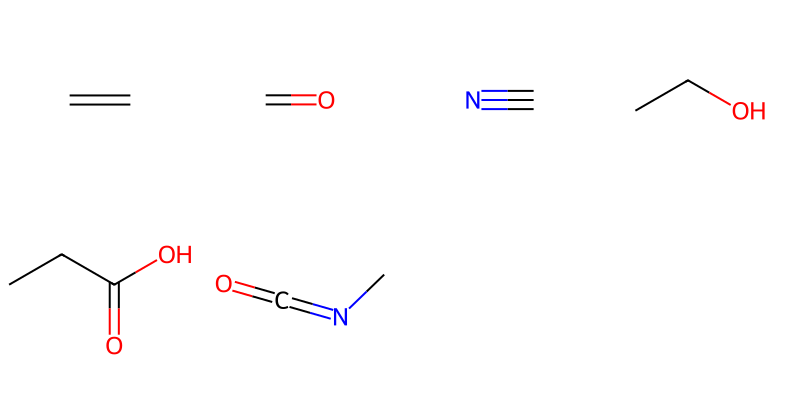

In [7]:
PandasTools.FrameToGridImage(df.head(6), molsPerRow=4)

In [8]:
from psikit import Psikit

In [10]:
%time
pk = Psikit()
pk.read_from_smiles("C=C")
print("Optimized SCF Energy: ", pk.optimize())

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs

  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.
Optimizer: Optimization complete!
Optimized SCF Energy:  -78.03876941259804


In [11]:
print(df.smiles)

0         C=C
1         C=O
2         C#N
3         CCO
4    CCC(=O)O
5      CN=C=O
Name: smiles, dtype: object


In [12]:
%time
energy = []
for i in df.smiles:
    pk.read_from_smiles(i)
    energy_value = pk.optimize()
    print("Optimized SCF Energy for",i,": ", energy_value)
    energy.append(energy_value)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs
Optimizer: Optimization complete!
Optimized SCF Energy for C=C :  -78.0387694133275
Optimizer: Optimization complete!
Optimized SCF Energy for C=O :  -113.86953646695467
Optimizer: Optimization complete!
Optimized SCF Energy for C#N :  -92.87694247778381
Optimizer: Optimization complete!
Optimized SCF Energy for CCO :  -154.08991870726382
Optimizer: Optimization complete!
Optimized SCF Energy for CCC(=O)O :  -266.85898515780843
Optimizer: Optimization complete!
Optimized SCF Energy for CN=C=O :  -206.7955418294219


,smiles,ROMol,Energy
0,C=C,,-78.038769
1,C=O,,-113.869536
2,C#N,,-92.876942
3,CCO,,-154.089919
4,CCC(=O)O,,-266.858985
5,CN=C=O,,-206.795542

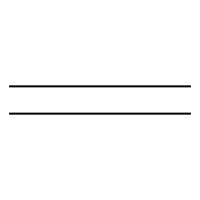
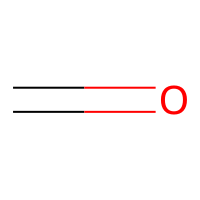
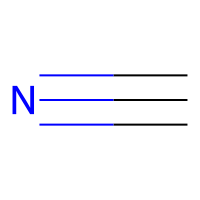
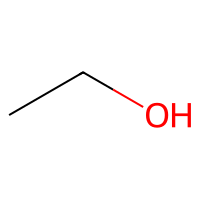
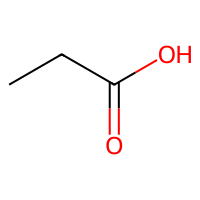
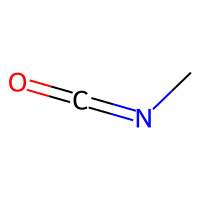

In [26]:
df.insert(2, "Energy", energy)
df